<a href="https://colab.research.google.com/github/Xt1naii/hw_NGS_scRNA/blob/main/hw_scRNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Домашнее задание «Анализ scRNA-Seq»**

### Студент: Кристина Мотузенко

### Группа: мАДБМ НИУ ВШЭ

Установка scanpy

In [ ]:
!pip install scanpy

In [ ]:
!pip install matplotlib==3.1.3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore") # Отключаем warning'и, которые могут мешать по ходу работы
sc.settings.verbosity = 3 # Делаем так, чтобы scanpy выводил максимально подробные логи

# Настраиваем общую эстетику картинок
sc.settings.set_figure_params(dpi=150) # Качество картинок
sns.set(font_scale=1) # Размер шрифта
sns.set_style("ticks") # Стиль картинок

In [ ]:
PATH = "./drive/MyDrive/scRNA/"

# Задание 1

## Найдите датасет scRNA-Seq, соответствующий вашим научным интересам.

Я использовала данные https://singlecell.broadinstitute.org/single_cell/study/SCP1696/single-cell-expression-data-for-d-melanogaster-wild-type-intestines#study-summary. 

Данные были получены с помощью 10X.

Описание: single-cell RNA sequencing profiles of intestines from control 10-day-old virgin female flies

## Создайте AnnData-объект с этим датасетом

In [ ]:
adata = sc.read_mtx(PATH + "WT_matrix.mtx.gz")

In [ ]:
var = pd.read_csv(PATH + "WT_features.tsv",sep = '\t',header= None )

In [ ]:
var.head()

,0,1,2
0,FBgn0267431,Myo81F,Gene Expression
1,FBgn0085804,CR41571,Gene Expression
2,FBgn0039987,CR12798,Gene Expression
3,FBgn0267798,CR46123,Gene Expression
4,FBgn0267797,CR46122,Gene Expression


In [ ]:
var.index = var[1]

In [ ]:
var.index.name = 'Gene Name'
var.columns = ['gene_id','gene_name', 'info']
var

,gene_id,gene_name,info
Gene Name,,,
Myo81F,FBgn0267431,Myo81F,Gene Expression
CR41571,FBgn0085804,CR41571,Gene Expression
CR12798,FBgn0039987,CR12798,Gene Expression
CR46123,FBgn0267798,CR46123,Gene Expression
CR46122,FBgn0267797,CR46122,Gene Expression
...,...,...,...
CR45933,FBgn0267595,CR45933,Gene Expression
Su(Ste):CR42433,FBgn0259864,Su(Ste):CR42433,Gene Expression
CG40635,FBgn0085506,CG40635,Gene Expression


In [ ]:
obs = pd.read_csv(PATH + "WT_barcodes.tsv.gz",sep = '\t', header = None, index_col = 0)
obs.index.name = 'barcode'
obs

""
barcode
AAACCCAAGAGTCCGA-1
AAACCCAAGTGGACGT-1
AAACCCACAAGTGACG-1
AAACCCAGTTTGGAGG-1
AAACCCATCTAAACGC-1
...
TTTGGAGAGACTCCGC-1
TTTGGTTAGCCTTTCC-1
TTTGTTGAGCGTATAA-1


In [ ]:
cell_types = pd.read_csv(PATH + "WT_metadata_.txt", delimiter=',')

In [ ]:
cell_types.head()

,NAME,biosample_id,donor_id,CellType,species,species__ontology_label,sex,disease,disease__ontology_label,organ,organ__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label
0,AAACCCAAGAGTCCGA-1,WT,WT,esg-N+,NCBITaxon:7227,Drosophila melanogaster,female,PATO_0000461,normal,UBERON_0000160,intestine,EFO:0009922,10x 3' v3
1,AAACCCAAGTGGACGT-1,WT,WT,aEC,NCBITaxon:7227,Drosophila melanogaster,female,PATO_0000461,normal,UBERON:0000160,intestine,EFO:0009922,10x 3' v3
2,AAACCCACAAGTGACG-1,WT,WT,mEC-1,NCBITaxon:7227,Drosophila melanogaster,female,PATO_0000461,normal,UBERON:0000160,intestine,EFO:0009922,10x 3' v3
3,AAACCCAGTTTGGAGG-1,WT,WT,pEC-2,NCBITaxon:7227,Drosophila melanogaster,female,PATO_0000461,normal,UBERON:0000160,intestine,EFO:0009922,10x 3' v3
4,AAACCCATCTAAACGC-1,WT,WT,Progenitors,NCBITaxon:7227,Drosophila melanogaster,female,PATO_0000461,normal,UBERON:0000160,intestine,EFO:0009922,10x 3' v3


In [ ]:
cell_types.rename(columns={'NAME': 'name', 'CellType': 'cell_type'}, inplace=True)

In [ ]:
cell_types.isna().sum()

name                                            0
biosample_id                                    0
donor_id                                        0
cell_type                                       0
species                                         0
species__ontology_label                         0
sex                                             0
disease                                         0
disease__ontology_label                         0
organ                                           0
organ__ontology_label                           0
library_preparation_protocol                    0
library_preparation_protocol__ontology_label    0
dtype: int64

In [ ]:
cell_types = cell_types[['name', 'cell_type']]

In [ ]:
cell_types = cell_types.set_index('name')

In [ ]:
cell_types.nunique()

cell_type    16
dtype: int64

In [ ]:
obs = obs.join(cell_types)

In [ ]:
obs.head()

,cell_type
barcode,
AAACCCAAGAGTCCGA-1,esg-N+
AAACCCAAGTGGACGT-1,aEC
AAACCCACAAGTGACG-1,mEC-1
AAACCCAGTTTGGAGG-1,pEC-2
AAACCCATCTAAACGC-1,Progenitors


In [ ]:
obs = obs.fillna('other')

In [ ]:
obs.isna().sum()

cell_type    0
dtype: int64

In [ ]:
adata

AnnData object with n_obs × n_vars = 17737 × 4242

In [ ]:
adata = adata.T.copy()

In [ ]:
adata.obs = obs
adata.var = var
adata

AnnData object with n_obs × n_vars = 4242 × 17737
    obs: 'cell_type'
    var: 'gene_id', 'gene_name', 'info'

In [ ]:
adata.X

<4242x17737 sparse matrix of type '<class 'numpy.float32'>'
	with 3496718 stored elements in Compressed Sparse Row format>

In [ ]:
adata.obs

,cell_type
barcode,
AAACCCAAGAGTCCGA-1,esg-N+
AAACCCAAGTGGACGT-1,aEC
AAACCCACAAGTGACG-1,mEC-1
AAACCCAGTTTGGAGG-1,pEC-2
AAACCCATCTAAACGC-1,Progenitors
...,...
TTTGGAGAGACTCCGC-1,mEC-2
TTTGGTTAGCCTTTCC-1,Immature EC
TTTGTTGAGCGTATAA-1,Unknown-2


In [ ]:
adata.var.fillna('other')

,gene_id,gene_name,info
Gene Name,,,
Myo81F,FBgn0267431,Myo81F,Gene Expression
CR41571,FBgn0085804,CR41571,Gene Expression
CR12798,FBgn0039987,CR12798,Gene Expression
CR46123,FBgn0267798,CR46123,Gene Expression
CR46122,FBgn0267797,CR46122,Gene Expression
...,...,...,...
CR45933,FBgn0267595,CR45933,Gene Expression
Su(Ste):CR42433,FBgn0259864,Su(Ste):CR42433,Gene Expression
CG40635,FBgn0085506,CG40635,Gene Expression


# Задание 2



## Проведите контроль качества этого датасета способами, которые были обговорены во время семинаров

Могут быть использованы следующие метрики качества:


*   количество UMI (мало - убираем)
*   дублеты (избавляемся с помощью scrublet)

*   количество митохондриальной экспрессии (сигнализирует о повреждении клетки)
*   % рибосомальных генов





Dmel - соответствует [митохондриальной ДНК](http://flybase.org/reports/FBgn0013298.html) дрозофилы. 

In [ ]:
adata.var["mt"] = adata.var_names.str.startswith("Dmel")

In [ ]:
adata.var["mt"].nunique() 

1

In [ ]:
adata.var

,gene_id,gene_name,info,mt
Gene Name,,,,
Myo81F,FBgn0267431,Myo81F,Gene Expression,False
CR41571,FBgn0085804,CR41571,Gene Expression,False
CR12798,FBgn0039987,CR12798,Gene Expression,False
CR46123,FBgn0267798,CR46123,Gene Expression,False
CR46122,FBgn0267797,CR46122,Gene Expression,False
...,...,...,...,...
CR45933,FBgn0267595,CR45933,Gene Expression,False
Su(Ste):CR42433,FBgn0259864,Su(Ste):CR42433,Gene Expression,False
CG40635,FBgn0085506,CG40635,Gene Expression,False


In [ ]:
adata.var.isna().sum()

gene_id      0
gene_name    0
info         0
mt           0
dtype: int64

In [ ]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], percent_top=None, log1p=None, inplace=True) # Подсчитываем QC
adata.obs.head()

,cell_type,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
barcode,,,,,
AAACCCAAGAGTCCGA-1,esg-N+,513,1208.0,0.0,0.0
AAACCCAAGTGGACGT-1,aEC,234,1457.0,0.0,0.0
AAACCCACAAGTGACG-1,mEC-1,655,2006.0,0.0,0.0
AAACCCAGTTTGGAGG-1,pEC-2,662,1810.0,0.0,0.0
AAACCCATCTAAACGC-1,Progenitors,1529,10826.0,0.0,0.0


In [ ]:
!pip install matplotlib==3.1.3

In [ ]:
import matplotlib.pyplot as plt

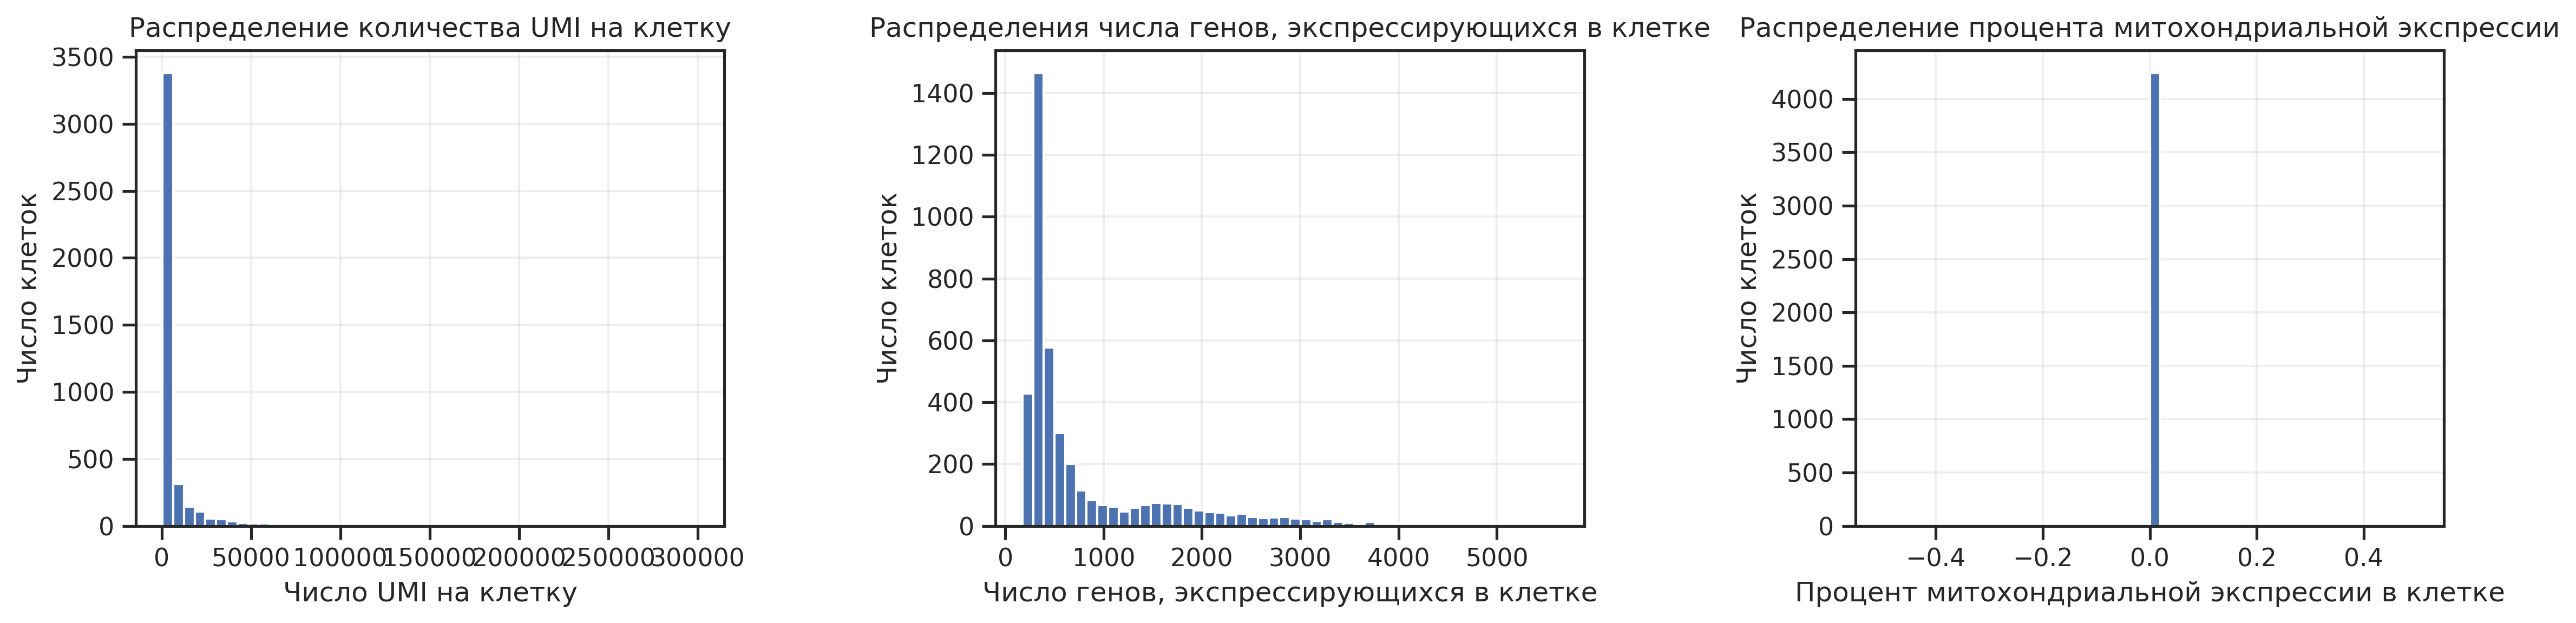

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4)) # Создаём сетку, чтобы отрисовать три графика

# Отрисовываем распределение общего числа UMI
sns.distplot(adata.obs["total_counts"], kde=False, ax=axes[0], hist_kws={"alpha":1})
axes[0].set_xlabel("Число UMI на клетку")
axes[0].set_ylabel("Число клеток")
axes[0].set_title("Распределение количества UMI на клетку")
axes[0].grid(alpha=0.3)

# Отрисовываем распределение числа генов по клеткам
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, ax=axes[1], hist_kws={"alpha":1})
axes[1].set_xlabel("Число генов, экспрессирующихся в клетке")
axes[1].set_ylabel("Число клеток")
axes[1].set_title("Распределения числа генов, экспрессирующихся в клетке")
axes[1].grid(alpha=0.3)

# Отрисовываем распределение митохондриальной экспрессии
sns.distplot(adata.obs["pct_counts_mt"], kde=False, ax=axes[2], hist_kws={"alpha":1})
axes[2].set_xlabel("Процент митохондриальной экспрессии в клетке")
axes[2].set_ylabel("Число клеток")
axes[2].set_title("Распределение процента митохондриальной экспрессии")
axes[2].grid(alpha=0.3)

fig.tight_layout()

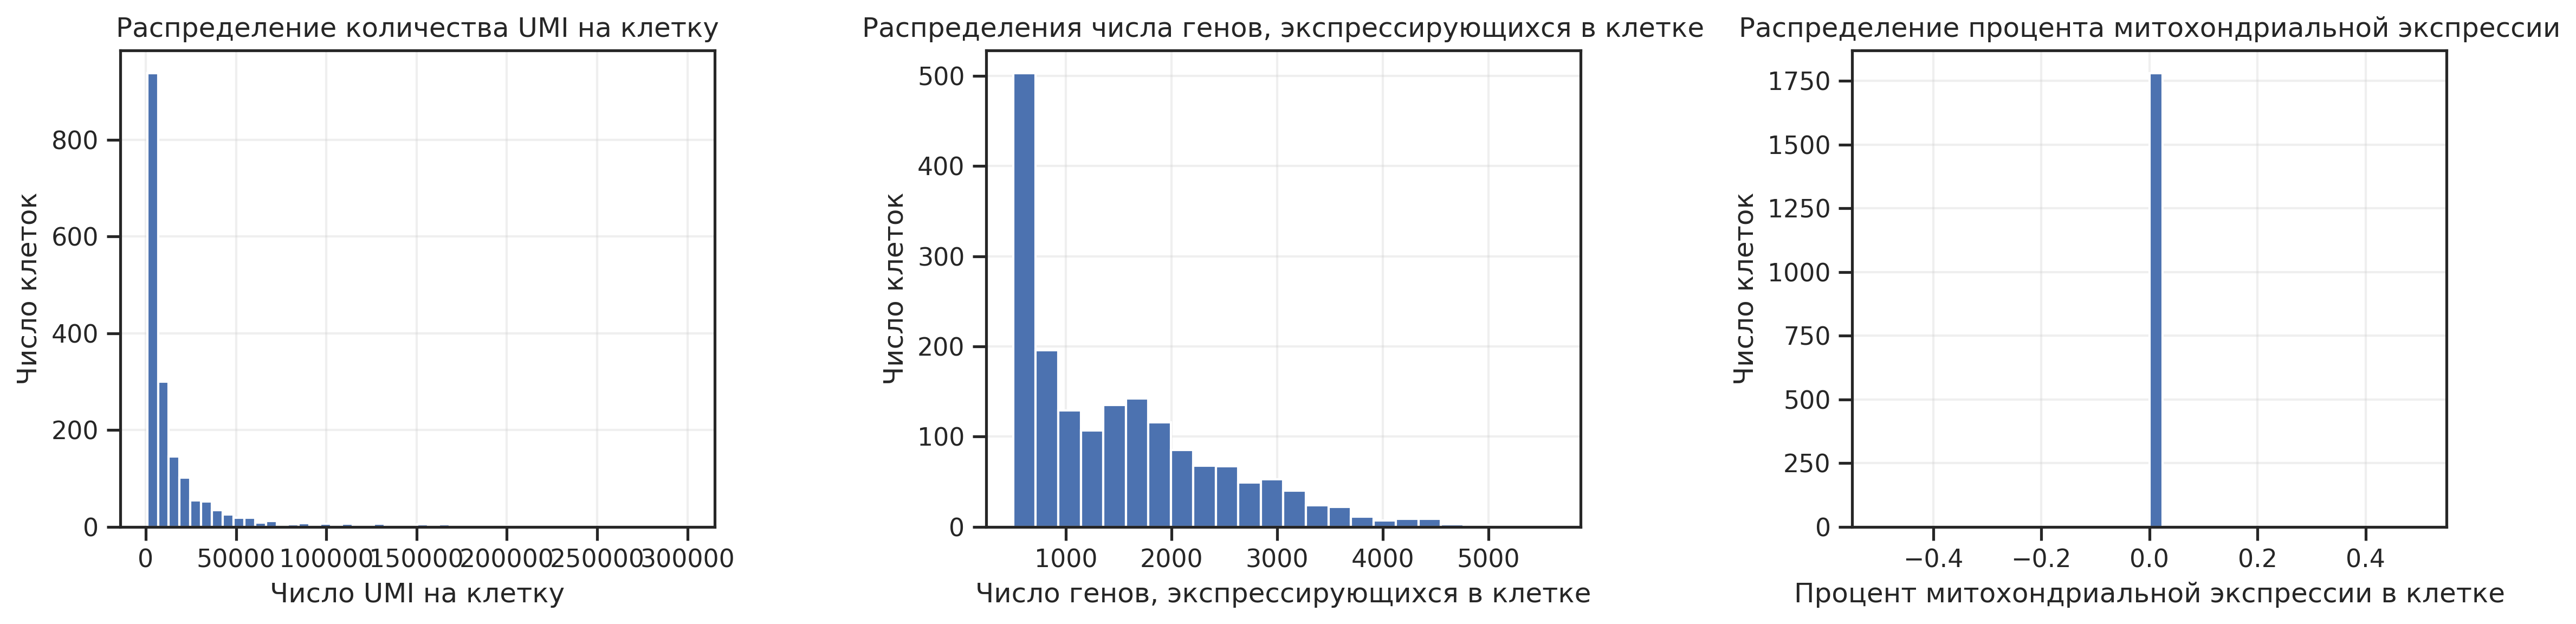

In [ ]:
adata = adata[adata.obs.total_counts >= 100] # Оставляем только те клетки, у которых суммарно ≥ 100 UMI
adata = adata[adata.obs.n_genes_by_counts >= 500]

# Строим графики, подобные тем, что выше
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4)) # Создаём сетку, чтобы отрисовать три графика

# Отрисовываем распределение общего числа UMI
sns.distplot(adata.obs["total_counts"], kde=False, ax=axes[0], hist_kws={"alpha":1})
axes[0].set_xlabel("Число UMI на клетку")
axes[0].set_ylabel("Число клеток")
axes[0].set_title("Распределение количества UMI на клетку")
axes[0].grid(alpha=0.3)

# Отрисовываем распределение числа генов по клеткам
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, ax=axes[1], hist_kws={"alpha":1})
axes[1].set_xlabel("Число генов, экспрессирующихся в клетке")
axes[1].set_ylabel("Число клеток")
axes[1].set_title("Распределения числа генов, экспрессирующихся в клетке")
axes[1].grid(alpha=0.3)

# Отрисовываем распределение митохондриальной экспрессии
sns.distplot(adata.obs["pct_counts_mt"], kde=False, ax=axes[2], hist_kws={"alpha":1})
axes[2].set_xlabel("Процент митохондриальной экспрессии в клетке")
axes[2].set_ylabel("Число клеток")
axes[2].set_title("Распределение процента митохондриальной экспрессии")
axes[2].grid(alpha=0.3)

fig.tight_layout()

In [ ]:
!pip install scrublet

In [ ]:
import scanpy.external as sce

In [ ]:
sce.pp.scrublet(adata) # Запускаем scrublet для обнаружения дублетов

Running Scrublet
filtered out 8025 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.40
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 2.7%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 2.1%
    Scrublet finished (0:00:02)


In [ ]:
adata.obs.head()

,cell_type,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,doublet_score,predicted_doublet
barcode,,,,,,,
AAACCCAAGAGTCCGA-1,esg-N+,513,1208.0,0.0,0.0,0.031634,False
AAACCCACAAGTGACG-1,mEC-1,655,2006.0,0.0,0.0,0.052257,False
AAACCCAGTTTGGAGG-1,pEC-2,662,1810.0,0.0,0.0,0.087479,False
AAACCCATCTAAACGC-1,Progenitors,1529,10826.0,0.0,0.0,0.018355,False
AAACGAAAGTAATTGG-1,Progenitors,2094,19960.0,0.0,0.0,0.022059,False


In [ ]:
adata

AnnData object with n_obs × n_vars = 1781 × 17737
    obs: 'cell_type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_id', 'gene_name', 'info', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'

In [ ]:
adata = adata[~adata.obs.predicted_doublet]
print(adata)

View of AnnData object with n_obs × n_vars = 1780 × 17737
    obs: 'cell_type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_id', 'gene_name', 'info', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'scrublet'


In [ ]:
adata.layers["counts"] = adata.X.copy()

Контроль за дисперсией

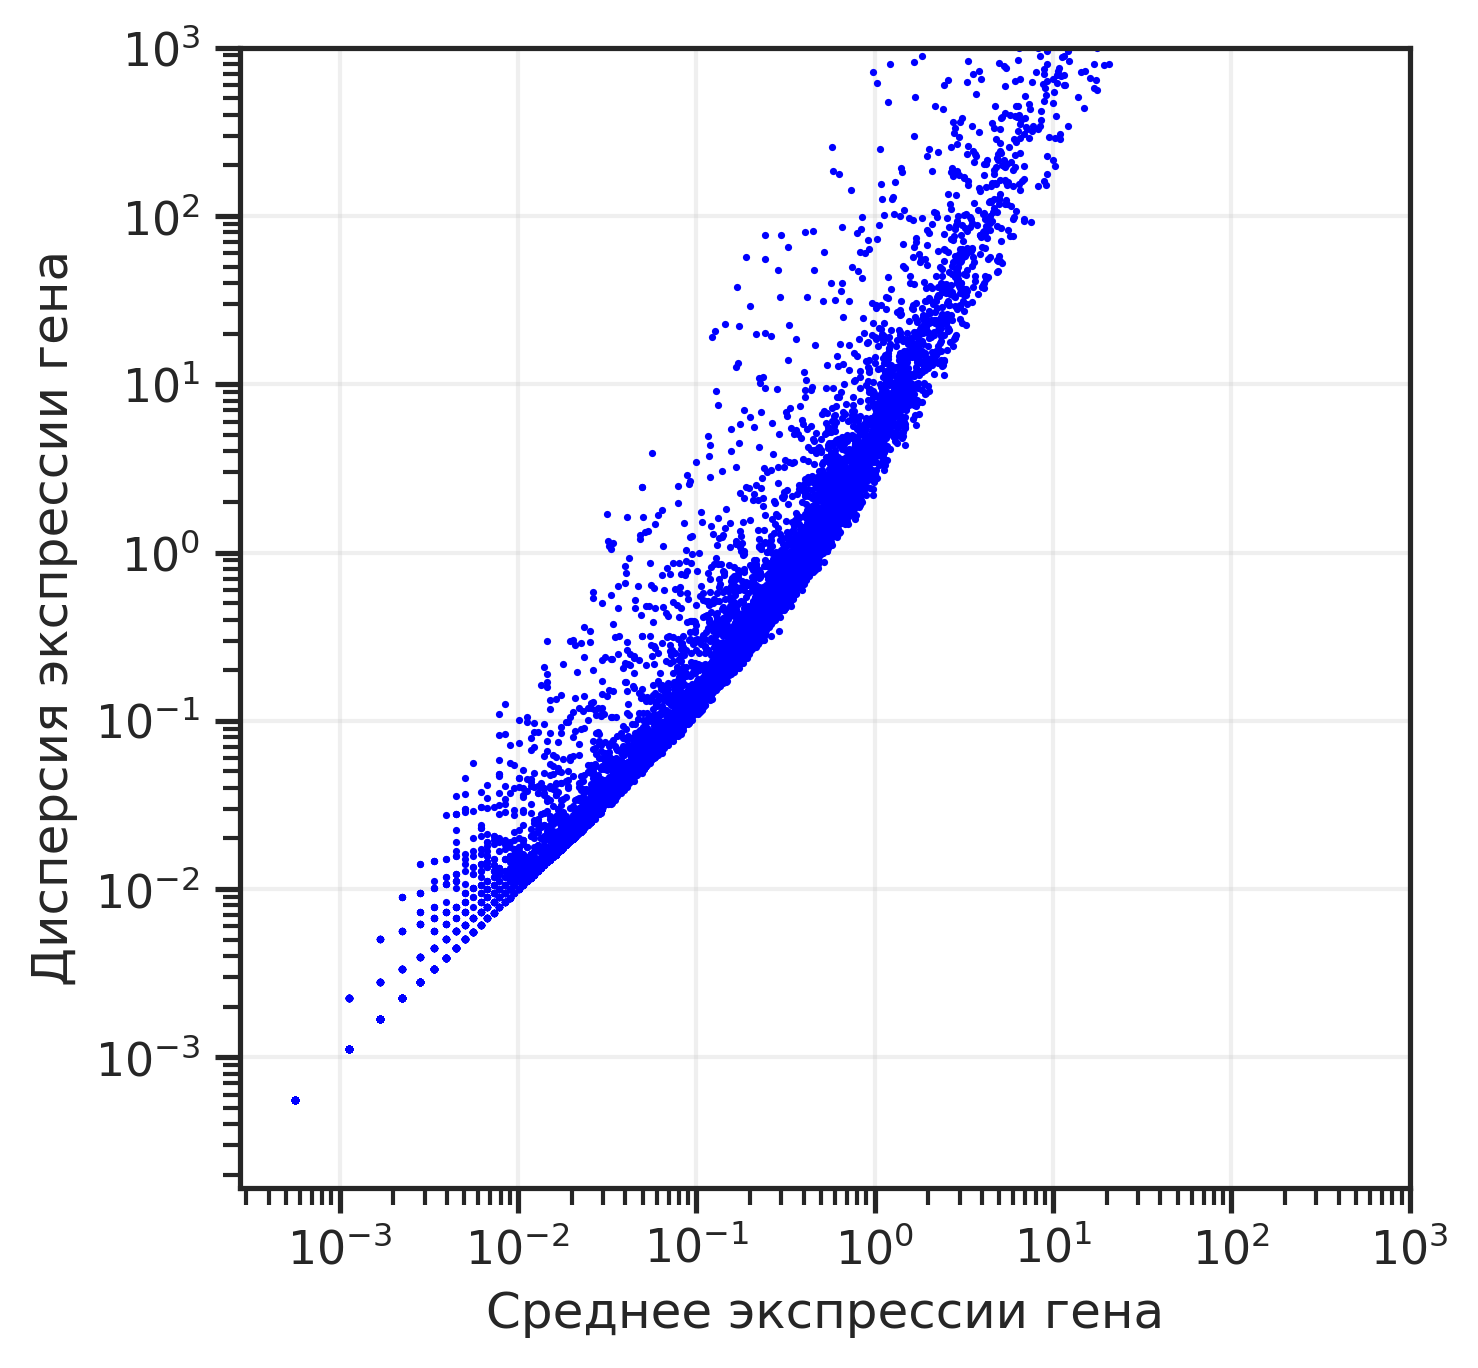

In [ ]:
variance = np.var(adata.layers["counts"].A, axis=0)
mean = np.mean(adata.layers["counts"].A, axis=0)

mean = mean[variance > 0]
variance = variance[variance > 0]

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))

sns.scatterplot(x=mean, y=variance, linewidth=0, s=3, color="blue", ax=ax)
ax.set_xlabel("Среднее экспрессии гена"); ax.set_ylabel("Дисперсия экспрессии гена")
ax.set_xscale("log"); ax.set_yscale("log")
ax.set_xlim(0, 1000); ax.set_ylim(0, 1000)

ax.grid(alpha=0.3)

# Задание 3

## Проанализируйте датасет стандартным пайплайном log1pPF, который мы рассматривали во время семинара

пайплайн log1pPF:


*   Нормализация
*   Логарифмирование (log1p)



In [ ]:
print("Суммы UMI на клетку до нормировки:", adata.X.sum(axis=1).T)

sc.pp.normalize_total(adata) # Нормировка
# sc.pp.normalize_per_cell(adata)
print("Суммы UMI на клетку после нормировки:", adata.X.sum(axis=1).T)

Суммы UMI на клетку до нормировки: [[ 1208.  2006.  1810. ... 17714.  2698. 41479.]]
normalizing counts per cell
    finished (0:00:00)
Суммы UMI на клетку после нормировки: [[6157.5    6157.5    6157.4995 ... 6157.499  6157.5    6157.5   ]]


In [ ]:
sc.pp.log1p(adata)

In [ ]:
!pip install  scikit-misc

In [ ]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=3000,
    layer="counts",
    flavor="seurat_v3",
) # Выделяем высоко вариабельные гены (HVG)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [ ]:
adata.var.head()

,gene_id,gene_name,info,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,highly_variable_rank,means,variances,variances_norm
Gene Name,,,,,,,,,,,,,
Myo81F,FBgn0267431,Myo81F,Gene Expression,False,5,0.001179,99.882131,5.0,False,NaN,0.002809,0.002803,0.857259
CR41571,FBgn0085804,CR41571,Gene Expression,False,0,0.000000,100.000000,0.0,False,NaN,0.000000,0.000000,0.000000
CR12798,FBgn0039987,CR12798,Gene Expression,False,0,0.000000,100.000000,0.0,False,NaN,0.000000,0.000000,0.000000
CR46123,FBgn0267798,CR46123,Gene Expression,False,19,0.004950,99.552098,21.0,False,NaN,0.011236,0.013364,0.865737
CR46122,FBgn0267797,CR46122,Gene Expression,False,0,0.000000,100.000000,0.0,False,NaN,0.000000,0.000000,0.000000


In [ ]:
adata.raw = adata

In [ ]:
adata = adata[:, adata.var.highly_variable] # Оставляем только подмножество генов, которые относятся к HVG
print(adata)

View of AnnData object with n_obs × n_vars = 1780 × 3000
    obs: 'cell_type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_id', 'gene_name', 'info', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg'
    layers: 'counts'


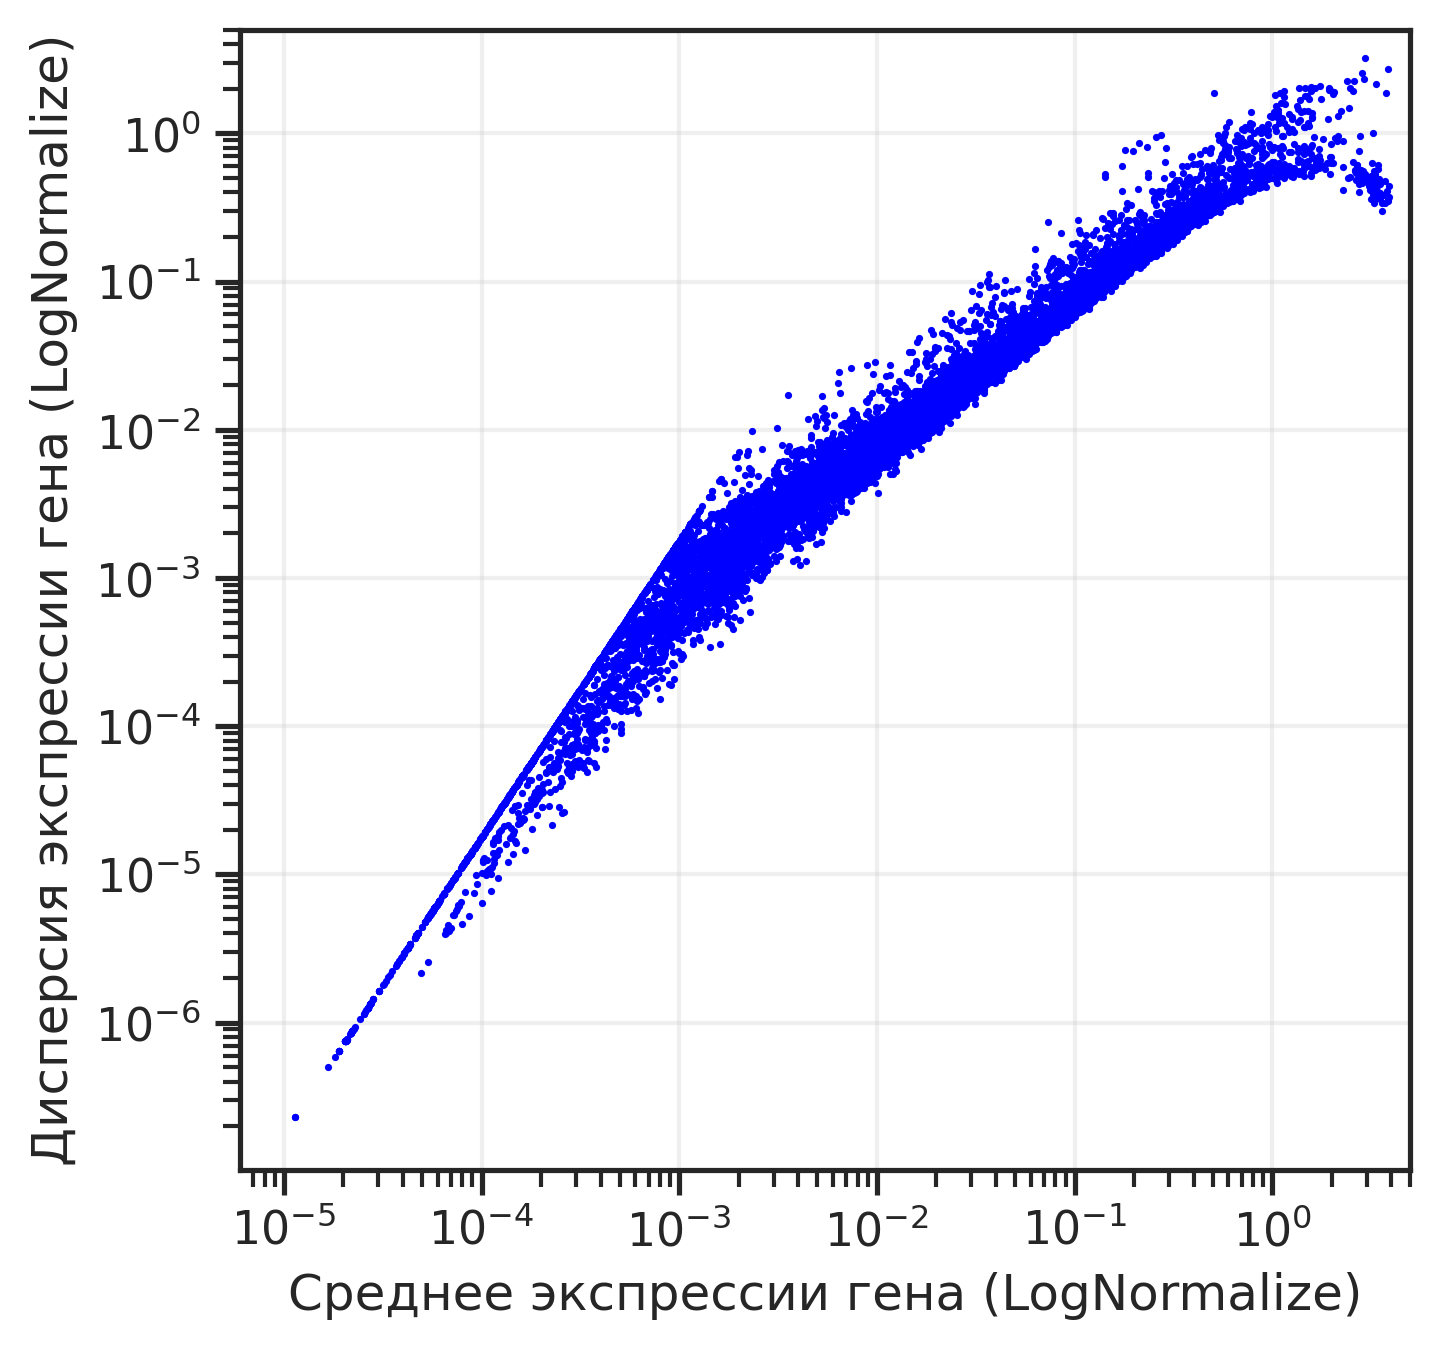

In [ ]:
variance = np.var(adata.raw.X.A, axis=0)
mean = np.mean(adata.raw.X.A, axis=0)

mean = mean[variance > 0]
variance = variance[variance > 0]

fig, ax = plt.subplots(dpi=150, figsize=(5, 5))

sns.scatterplot(x=mean, y=variance, linewidth=0, s=3, color="blue", ax=ax)
ax.set_xlabel("Среднее экспрессии гена (LogNormalize)"); ax.set_ylabel("Дисперсия экспрессии гена (LogNormalize)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(0, 5); ax.set_ylim(0, 5)

ax.grid(alpha=0.3)

## Нарисуйте итоговый эмбеддинг при помощи UMAP и отразите на нём цветом (а) итоговые кластера и (б) изначальные типы клеток. Сходится ли на первый взгляд кластеризация?

In [ ]:
sc.tl.pca(adata) 

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)


In [ ]:
adata # появилось obsm: 'X_pca'

AnnData object with n_obs × n_vars = 1780 × 3000
    obs: 'cell_type', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_id', 'gene_name', 'info', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'scrublet', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [ ]:
sc.tl.umap(adata, min_dist=0.5) # Рассчёт UMAP
sc.tl.tsne(adata, n_pcs=15)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
computing tSNE
    using 'X_pca' with n_pcs = 15
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:23)


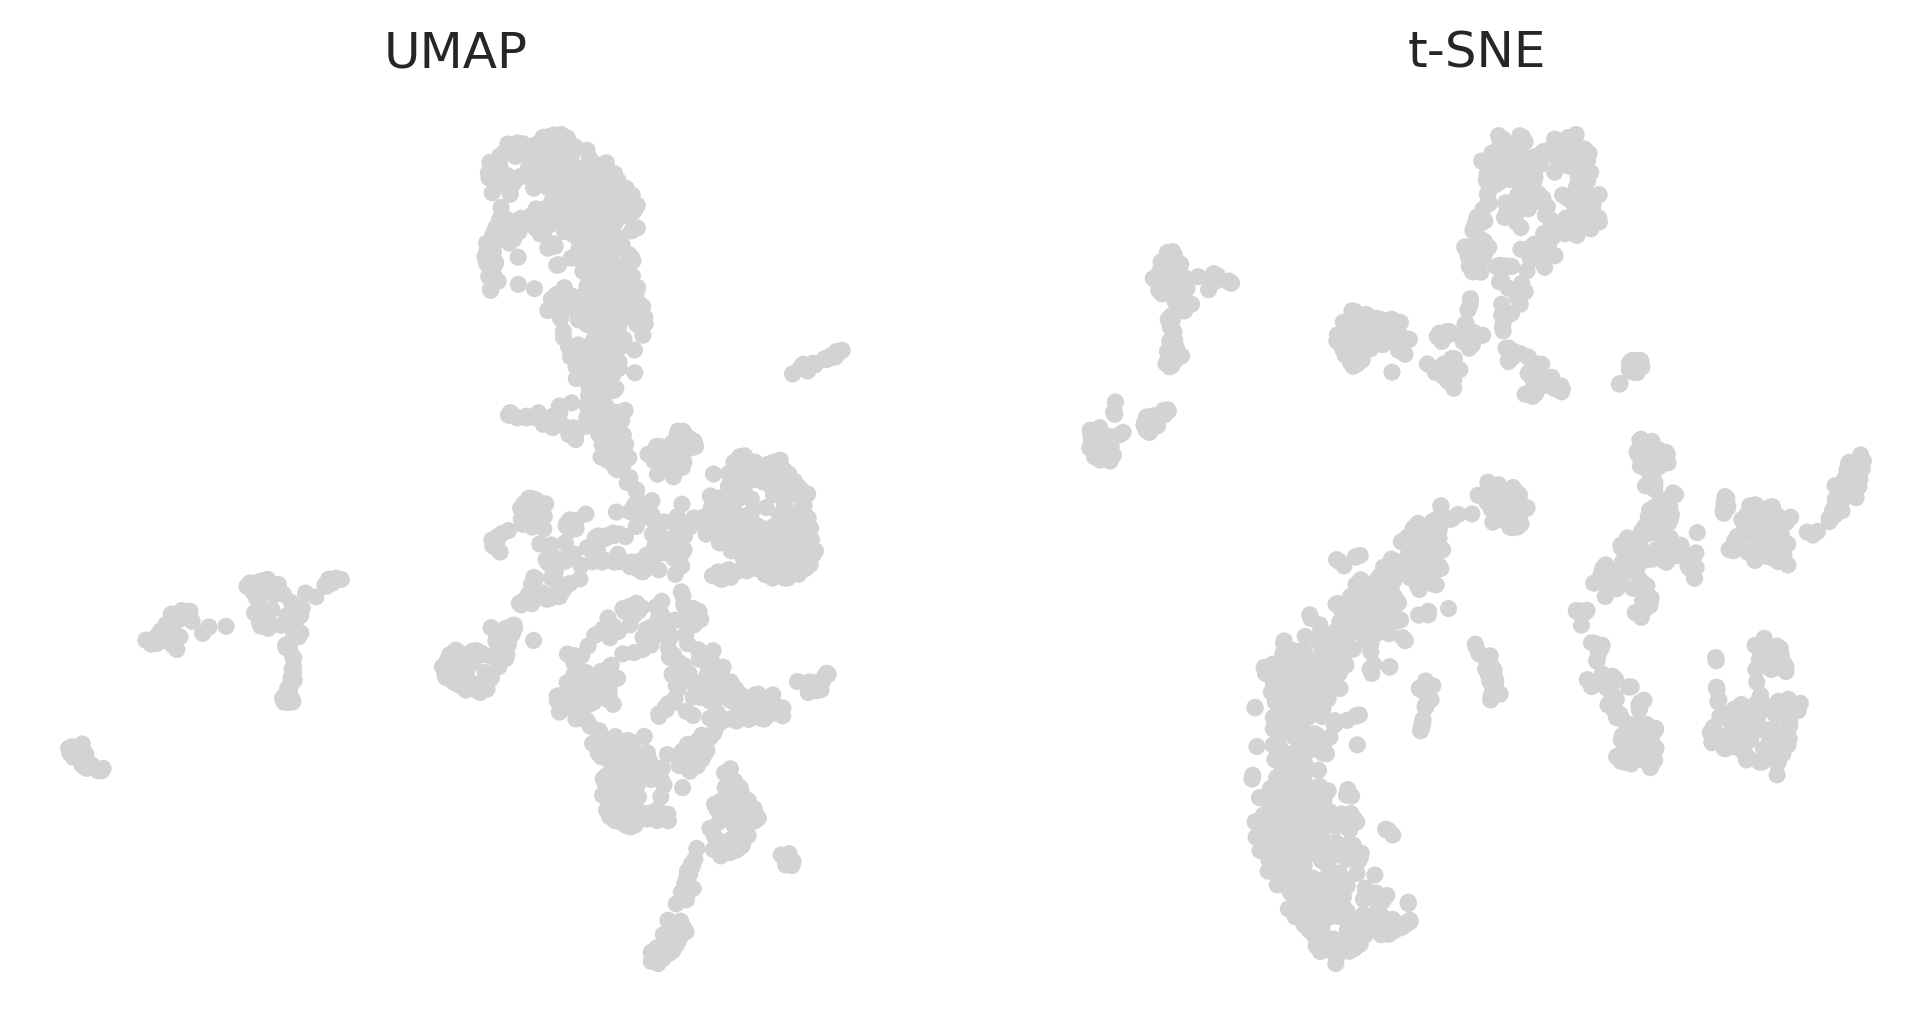

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))
sc.pl.umap(adata, frameon=False, ax=axs[0], title="UMAP", show=False) # Отрисовываем UMAP
sc.pl.tsne(adata, frameon=False, ax=axs[1], title="t-SNE", show=False) # Отрисовываем t-SNE

In [ ]:
!pip install leidenalg

In [ ]:
sc.tl.leiden(adata) # Кластеризация алгоритмом Leiden

running Leiden clustering
    finished: found 24 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


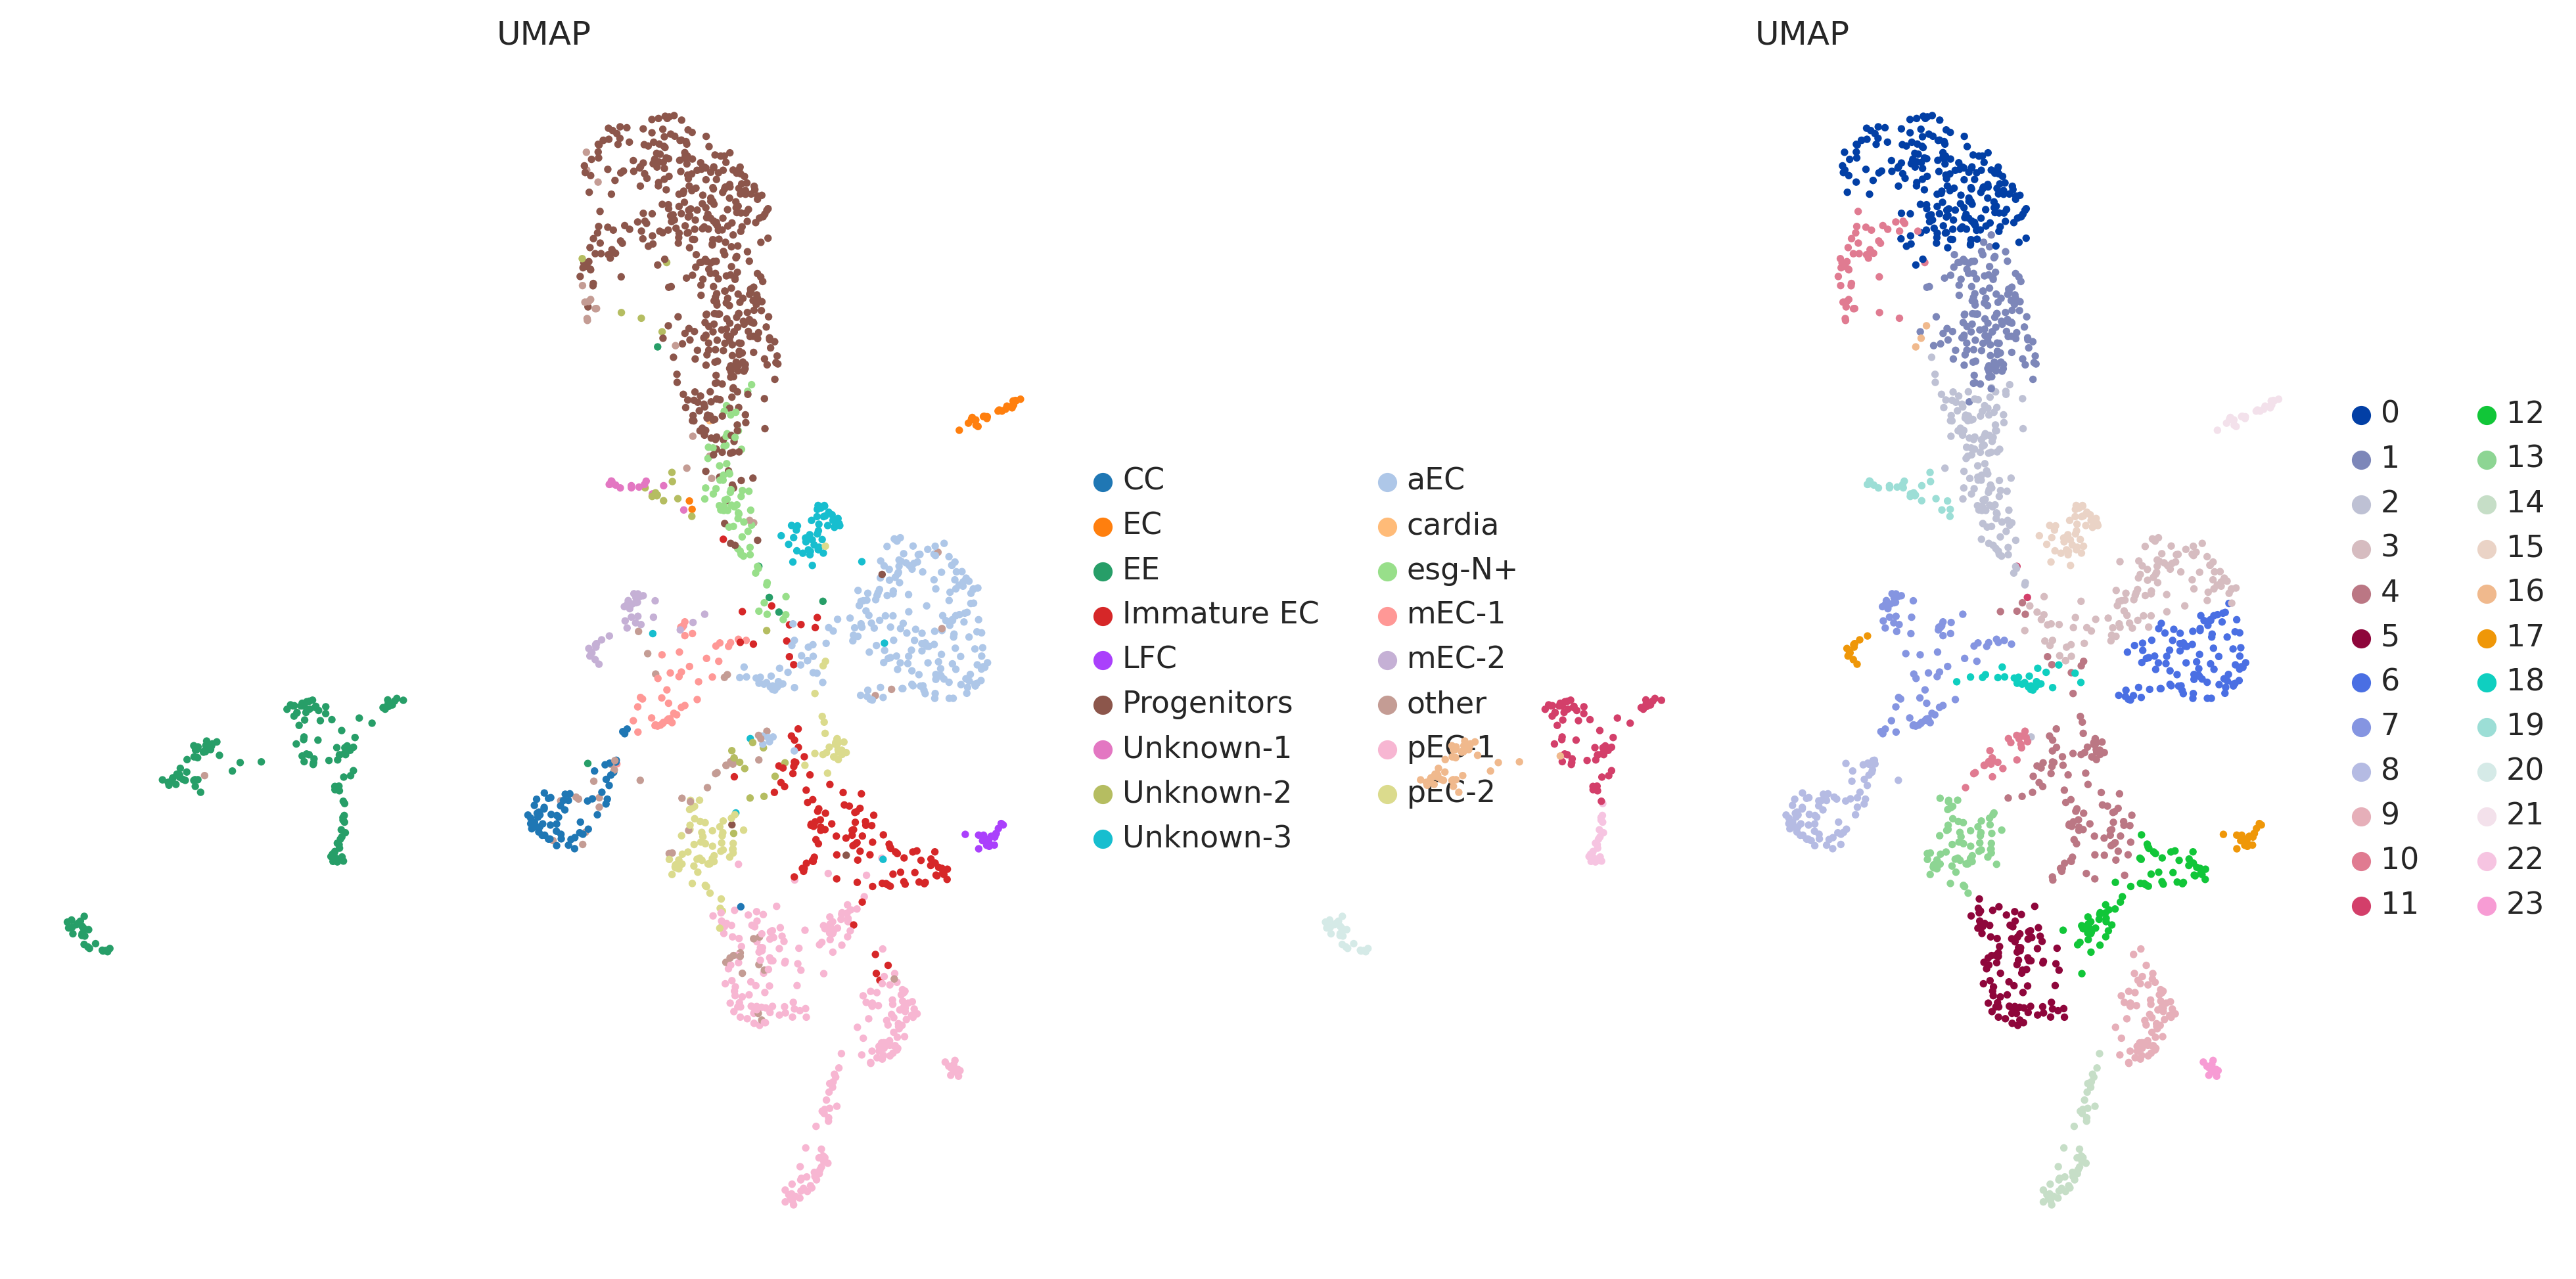

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))
sc.pl.umap(adata, color="cell_type", frameon=False, ax=axs[0], title="UMAP", show=False, s=30) # Отрисовываем UMAP
sc.pl.umap(adata, color="leiden", frameon=False, ax=axs[1], title="UMAP", show=False, s=30) # Отрисовываем UMAP

Видим, что кластеры соотносятся частично. Алгорит кластеризации находит больше кластеров, чем есть у нас.

# Задание 4

## Внимательно прочитайте статью группы Фабиана Тэиса с бенчмаркингом методов батч-коррекции. Какую метрику они используют для того, чтобы оценить качество интеграции?

Используют 14 метрик, которые можно поделить на 2 группы:

1) метрики устранения батч-эффекта

2) метрики сохранения биологической вариабельности



---



Как я поняла, вторую группу можно разделить на 2 подгруппы:

1) используют таргет (метки, соответствующие клеткам)

2) не используют таргет

## Воспользуйтесь той же метрикой (или теми же метриками, если их несколько) для того, чтобы оценить качество процессинга ваших данных при помощи метода log1pPF (в вашем случае мы будем использовать эту метрику для оценки качества процессинга, а не интеграции!).

Мы будем использовать:

1)NMI - [Normalized Mutual Information](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) (between two clusterings)

2)ARI - [Adjusted Rand Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)

3)ASW - [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

Все значения данных лежат от 0 до 1.

Авторы используют модуль [scib](www.github.com/theislab/scib)

In [ ]:
!pip install scib

In [ ]:
from scib import metrics

Сделаем функцию для подсчета метрик

In [ ]:
def calc_metrics(adata):
  nmi = metrics.nmi(adata, 'leiden', 'cell_type')
  ari = metrics.ari(adata, 'leiden', 'cell_type')
  asw = metrics.silhouette(adata, 'cell_type', 'X_pca')
  return {
      'nmi': nmi,
      'ari': ari,
      'asw': asw
  }

Посчитаем метрики для метода log1pPF

In [ ]:
calc_metrics(adata)

{'nmi': 0.701324973911459,
 'ari': 0.4355429991081959,
 'asw': 0.6106797829270363}

# Задание 5

## Модифицируйте пайплайн анализа, исключая из него различные стадии (например, не логарифмируйте экспрессии, не делайте PCA — попробуйте перебрать различные комбинации, которые только прийдут вам в голову). В случае какого процессинга ваша метрика (или ваши метрики) выдают наиболее высокое значение? Какие выводы вы можете сделать из этого

# Задание 6

## Напишите функцию, которая будет подбирать лучшие параметры числа главных компонент, числа соседей в kNN-графе и т. п. для данного датасета с известной аннотацией. Каковы эти значения в вашем случае?

Я решила воспользоваться специальной библиотекой Optuna, которая создана для подбора гиперпараметров

In [1]:
!pip install optuna

Возьмем тут 2 параметра: число соседей и число компонент

In [ ]:
import optuna

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(metric, trial):
    n_neighbors = trial.suggest_int('n_neighbors', 5, 50)
    n_pcs = trial.suggest_int('n_pcs', 10, 50)
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)
    sc.tl.umap(adata, min_dist=0.5)
    sc.tl.leiden(adata)
    return calc_metrics(adata)[metric]

In [ ]:
from functools import partial

In [ ]:
# Оптимизация NMI

study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, 'nmi'), n_trials=50, n_jobs=-1)
nmi_params = study.best_params

computing neighbors
computing neighbors
    using 'X_pca' with n_pcs = 17
    using 'X_pca' with n_pcs = 44
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) 

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7fe80ac3e6a0>


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:12)
running Leiden clustering
    finished: found 26 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7fe7a0978b80>


In [ ]:
# Оптимизация ARI

study = optuna.create_study(direction='maximize')
study.optimize(partial(objective, 'ari'), n_trials=40, n_jobs=-1)
ari_params = study.best_params

computing neighbors
computing neighbors
    using 'X_pca' with n_pcs = 34
    using 'X_pca' with n_pcs = 45
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering
    finished: found 18 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 24
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) 

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7fe7a0937820>


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 29 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7fe7a57f3f40>


In [ ]:
# Попробуем отпимизировать сразу два параметра

def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 5, 50)
    n_pcs = trial.suggest_int('n_pcs', 10, 50)
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs)
    sc.tl.umap(adata, min_dist=0.5)
    sc.tl.leiden(adata)
    metrics = calc_metrics(adata)
    return metrics['nmi'], metrics['ari']

In [ ]:
study = optuna.create_study(directions=['maximize', 'maximize'])
study.optimize(objective, n_trials=50, n_jobs=-1)

computing neighbors
    using 'X_pca' with n_pcs = 34
computing neighbors
    using 'X_pca' with n_pcs = 28
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 23
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) 

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7fe7a0689520>


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x7fe79f33a7c0>


In [ ]:
study.best_trials

[FrozenTrial(number=16, values=[0.7346442339670746, 0.5065617804826053], datetime_start=datetime.datetime(2022, 12, 25, 19, 12, 17, 421145), datetime_complete=datetime.datetime(2022, 12, 25, 19, 12, 36, 348460), params={'n_neighbors': 42, 'n_pcs': 50}, distributions={'n_neighbors': IntDistribution(high=50, log=False, low=5, step=1), 'n_pcs': IntDistribution(high=50, log=False, low=10, step=1)}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={}, trial_id=16, state=TrialState.COMPLETE, value=None),
 FrozenTrial(number=23, values=[0.730515483919104, 0.5315481246632418], datetime_start=datetime.datetime(2022, 12, 25, 19, 13, 6, 938998), datetime_complete=datetime.datetime(2022, 12, 25, 19, 13, 23, 158597), params={'n_neighbors': 34, 'n_pcs': 34}, distributions={'n_neighbors': IntDistribution(high=50, log=False, low=5, step=1), 'n_pcs': IntDistribution(high=50, log=False, low=10, step=1)}, user_attrs={}, system_attrs={'nsga2:generation': 0}, intermediate_values={},

In [ ]:
nmi_params, ari_params

({'n_neighbors': 21, 'n_pcs': 12}, {'n_neighbors': 19, 'n_pcs': 26})

In [ ]:
param_dict = {}

In [ ]:
sc.pp.neighbors(adata, n_neighbors=nmi_params['n_neighbors'], n_pcs=nmi_params['n_pcs'])
sc.tl.umap(adata, min_dist=0.5)
sc.tl.leiden(adata)
param_dict['nmi_opt'] = calc_metrics(adata)

computing neighbors
    using 'X_pca' with n_pcs = 12
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 19 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [ ]:
sc.pp.neighbors(adata, n_neighbors=ari_params['n_neighbors'], n_pcs=ari_params['n_pcs'])
sc.tl.umap(adata, min_dist=0.5)
sc.tl.leiden(adata)
param_dict['ari_opt'] = calc_metrics(adata)

computing neighbors
    using 'X_pca' with n_pcs = 26
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [ ]:
param_opt = pd.DataFrame(param_dict).T

In [ ]:
param_opt.loc['nmi_opt', 'n_neighbors'] = nmi_params['n_neighbors']
param_opt.loc['nmi_opt', 'n_pcs'] = nmi_params['n_pcs']

param_opt.loc['ari_opt', 'n_neighbors'] = ari_params['n_neighbors']
param_opt.loc['ari_opt', 'n_pcs'] = ari_params['n_pcs']

In [ ]:
param_opt

,nmi,ari,asw,n_neighbors,n_pcs
nmi_opt,0.706941,0.469339,0.61068,21.0,12.0
ari_opt,0.729130,0.501405,0.61068,19.0,26.0


Метрики на данном датасете без оптимизации параметров были следующие:

NMI = 0.7013

ARI = 0.4355

ASW = 0.6107

Мы видим, что оптимизация параметров по метрике ARI дала лучший результат. Данная метрика учитывает меру сходства между двумя кластеризациями путем рассмотрения всех пар выборок и подсчета пар, которые отнесены к одним и тем же или разным кластерам в прогнозируемой и истинной кластеризациях.

Видимо, для наших данных, учитывать такие пары важнее.

# Задание 7

# Попробуйте воспользоваться нестандартными подходами, которые мы обсуждали во время занятия — например, кластеризацией при помощи K-Means на пространстве PCA, используйте SVD вместо PCA, берите корень вместо логарифмирования — работает ли какой-то из методов для вашего датасета лучше, чем log1pPF?

Используем K-means на пространстве PCA

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=16)
clusters = kmeans.fit_predict(adata.obsm['X_pca'])

In [ ]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

Считаем NMI

In [ ]:
normalized_mutual_info_score(adata.obs['cell_type'].values, clusters)

0.7224606033867451

Считаем ARI

In [ ]:
adjusted_rand_score(adata.obs['cell_type'].values, clusters)

0.6391554004057504

Видим, что метрики улучшились, особенно ARI.

Используем SVD вместо PCA

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
svd = TruncatedSVD(n_components=100)

In [ ]:
svd.fit(adata.X)

TruncatedSVD(n_components=100)

In [ ]:
adata_svd = adata.copy()[:, :100]

In [ ]:
adata_svd.X = svd.transform(adata.X)

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [ ]:
sc.pp.neighbors(adata_svd, n_pcs=0, n_neighbors=34)
sc.tl.umap(adata_svd, min_dist=0.5)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


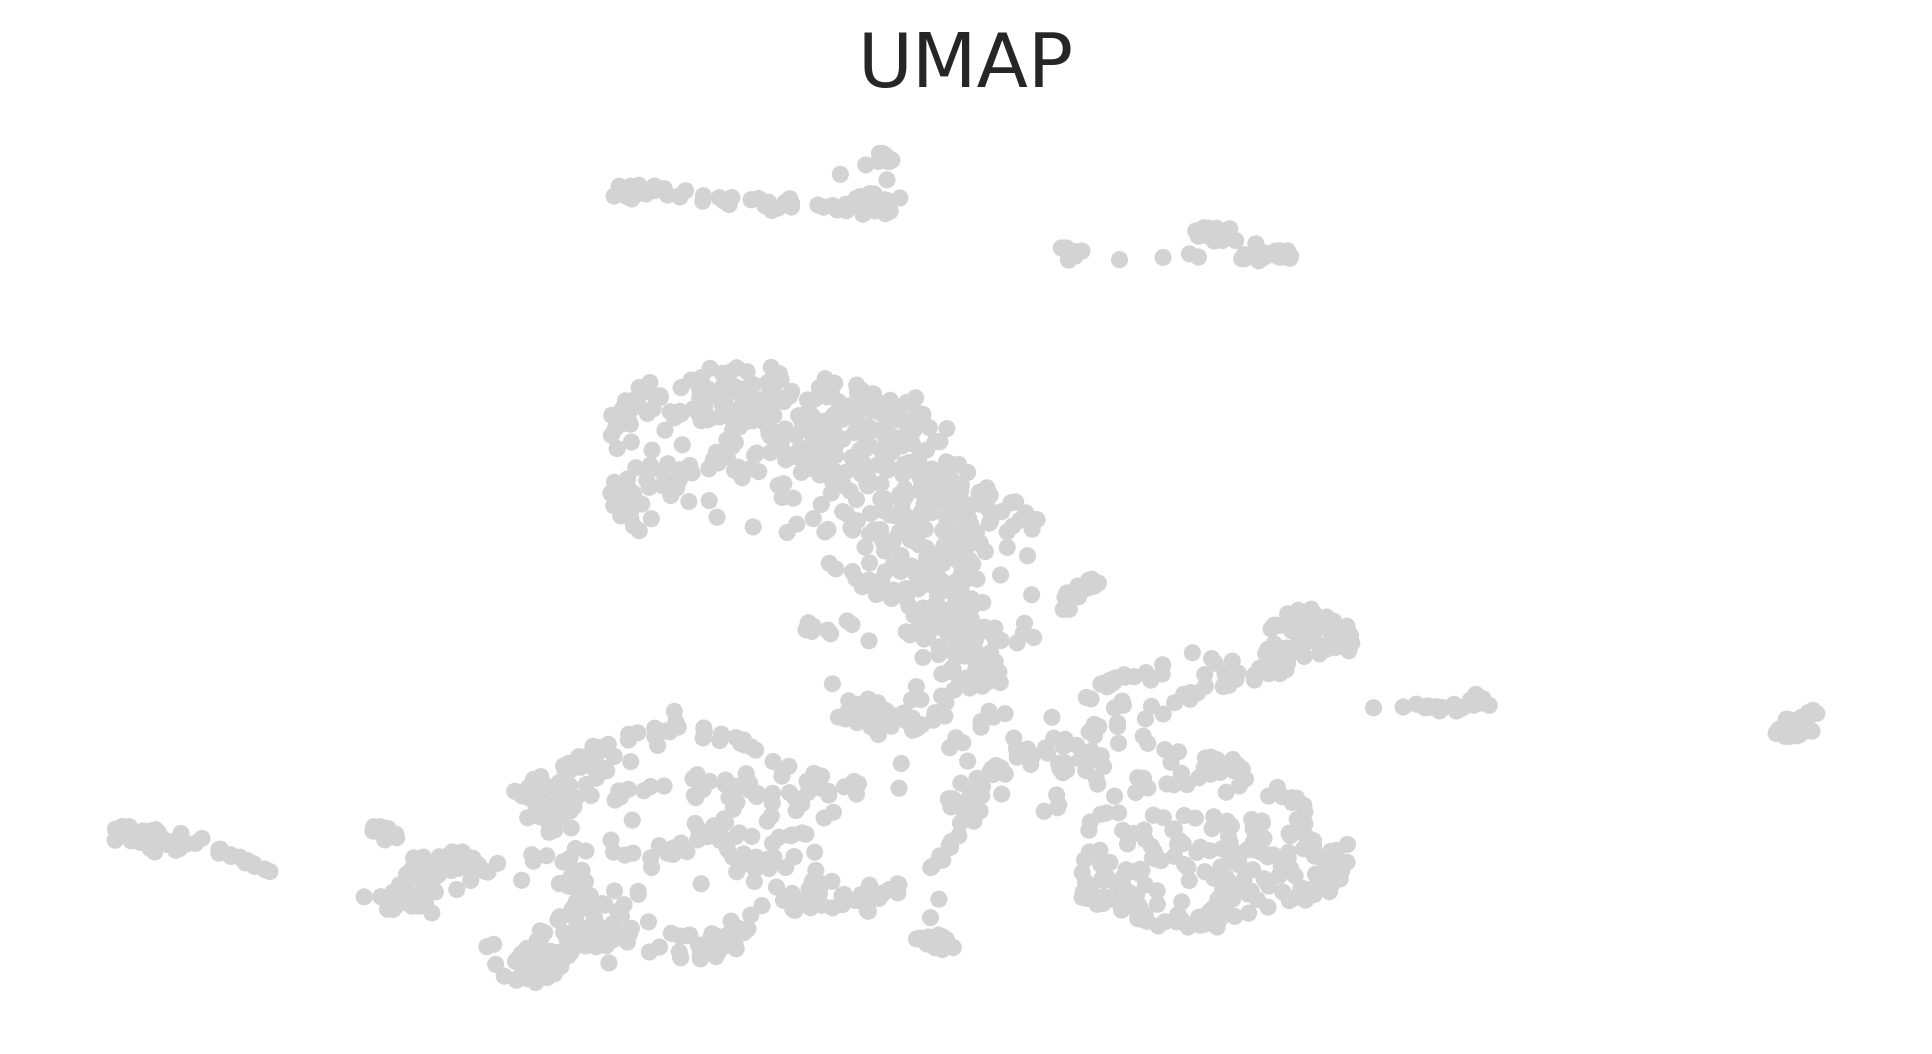

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(8, 4))
sc.pl.umap(adata, frameon=False, ax=axs, title="UMAP", show=False) # Отрисовываем UMAP

In [ ]:
sc.tl.leiden(adata) # Кластеризация алгоритмом Leiden

running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


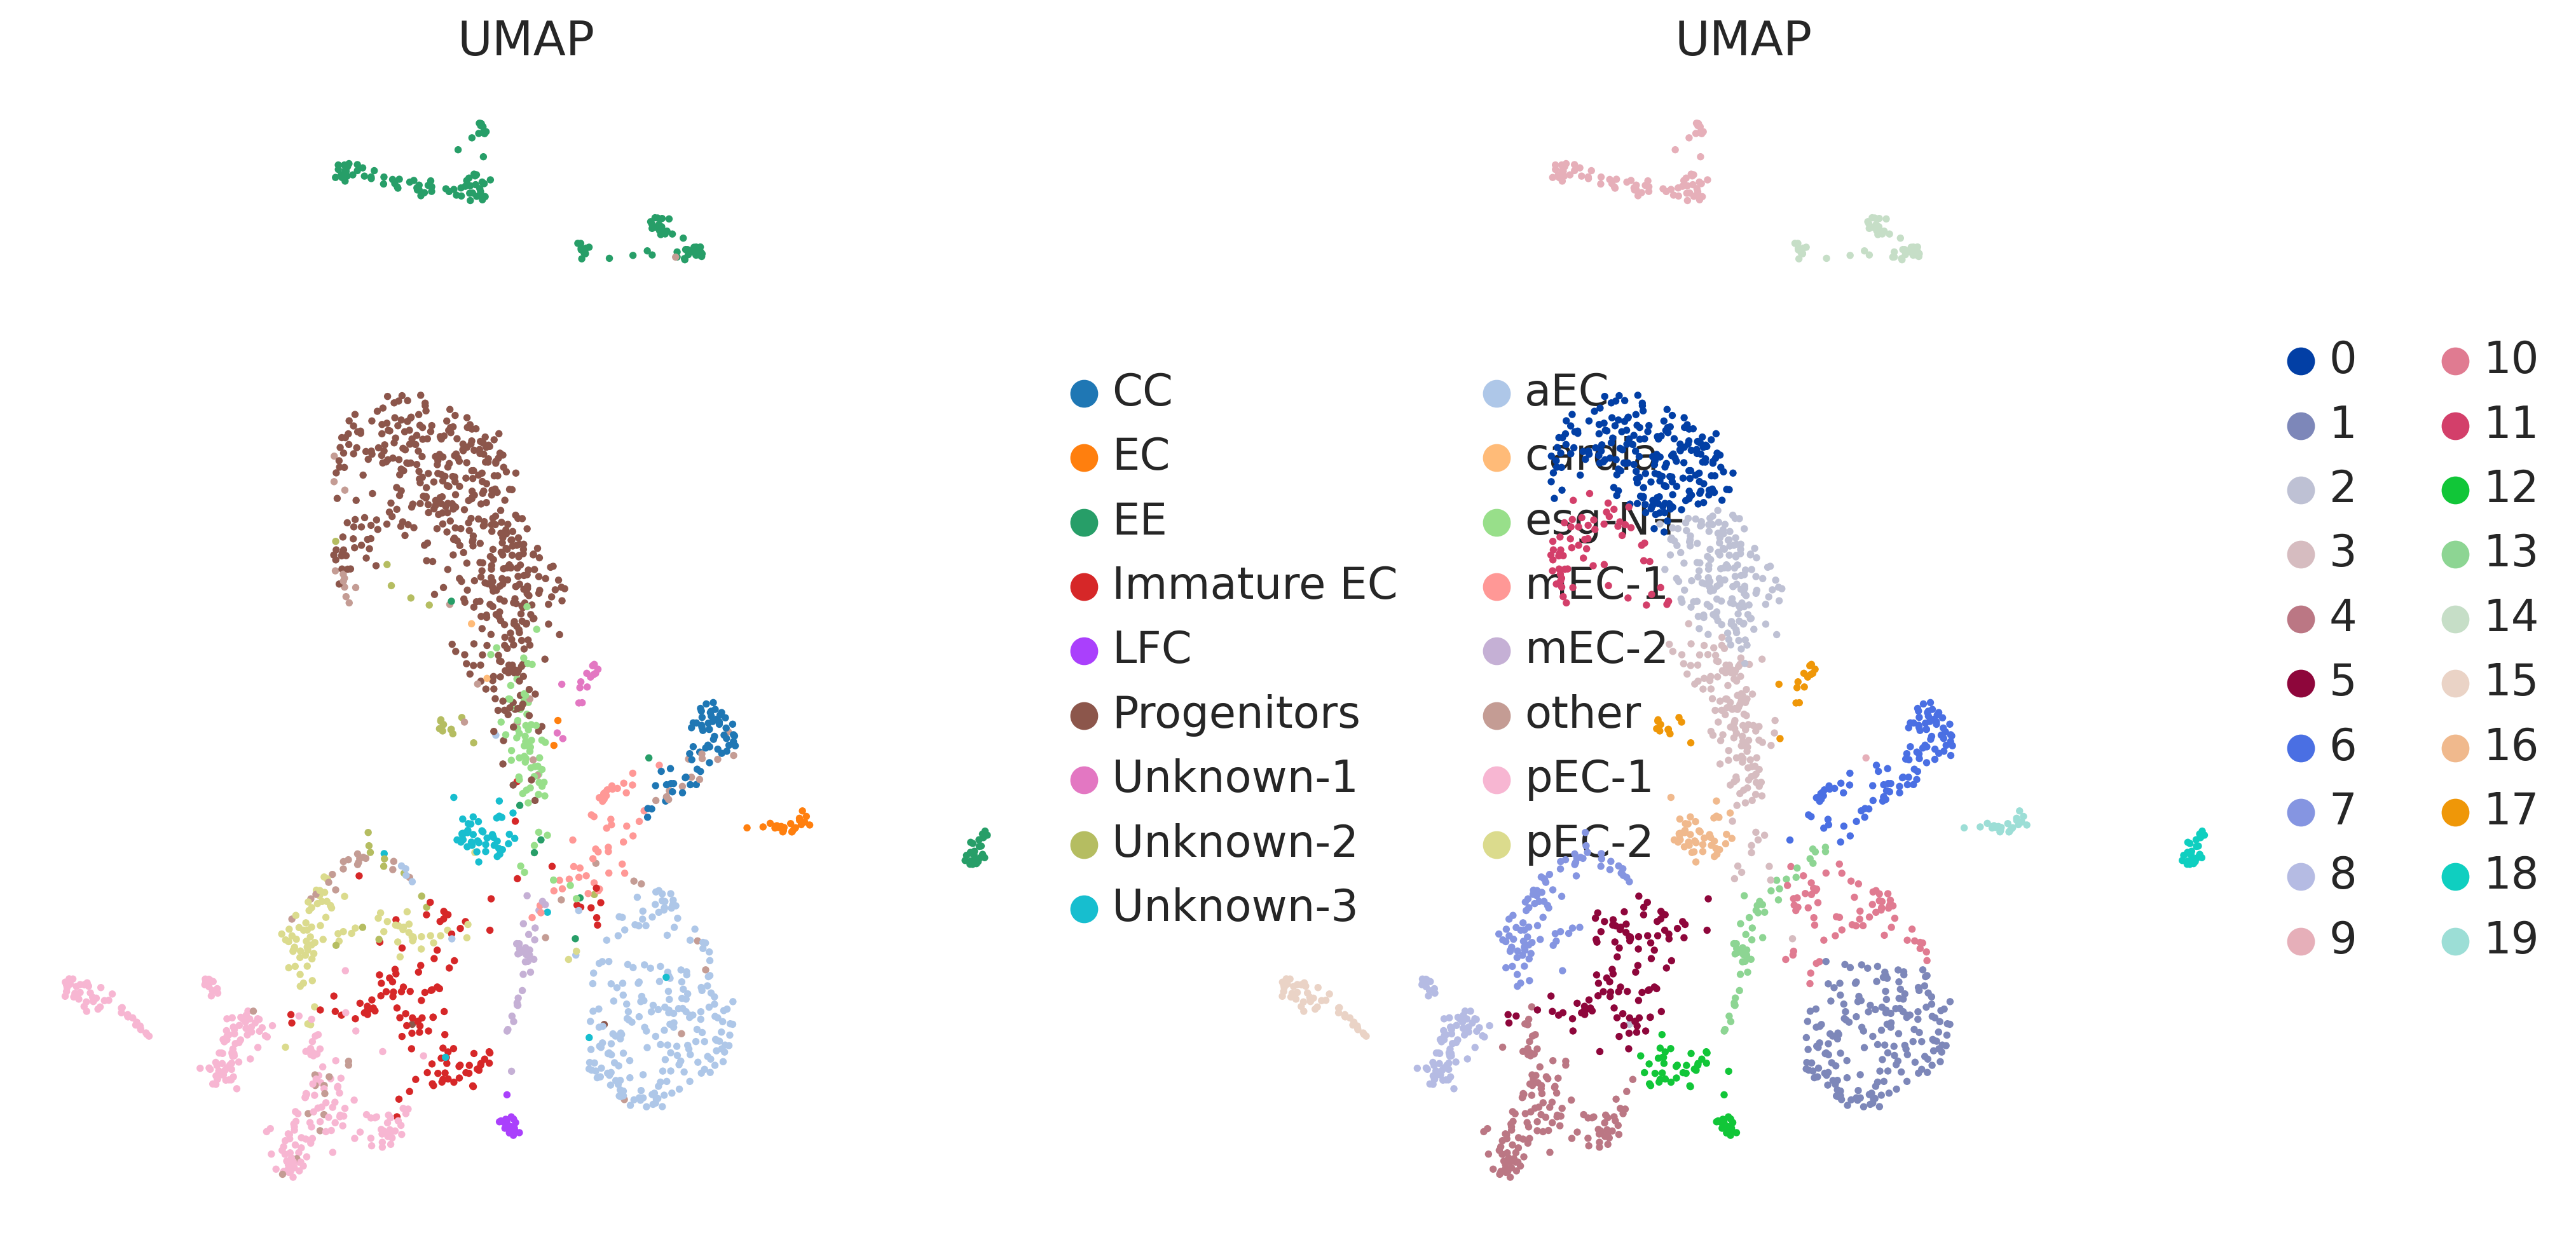

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 8))
sc.pl.umap(adata, color="cell_type", frameon=False, ax=axs[0], title="UMAP", show=False, s=30) # Отрисовываем UMAP
sc.pl.umap(adata, color="leiden", frameon=False, ax=axs[1], title="UMAP", show=False, s=30) # Отрисовываем UMAP

Метрики для SVD

Видим, что у нас получается 19 кластеров, которые частично сопадают с нашими кластерами.

In [ ]:
calc_metrics(adata_svd)

{'nmi': 0.715351835141932,
 'ari': 0.48027094199368664,
 'asw': 0.6106797829270363}

Использование SVD не улучшило наши метрики. 